因子分析步骤：
    对所给的数据样本进行标准化处理
    计算样本的相关矩阵R
    求相关矩阵R的特征值、特征向量
    根据系统要求的累积贡献度确定主因子的个数
    计算因子载荷矩阵A
    最终确定因子模型

# 1.导入库

In [2]:
# 数据处理
import pandas as pd
import numpy as np

# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
# 因子分析
from factor_analyzer import FactorAnalyzer

#中文编码处理
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 2.读取数据

In [3]:
df_china=pd.read_excel('D:\M\MATLAB Driver/forward\eighth\模型数据.xlsx',sheet_name='中国')
df_usa=pd.read_excel('D:\M\MATLAB Driver/forward\eighth\模型数据.xlsx',sheet_name='美国')
df_ger=pd.read_excel('D:\M\MATLAB Driver/forward\eighth\模型数据.xlsx',sheet_name='德国')
df_china


,X1,X3,X4,X2,X5,X6,X7,X8,X9
0,12310409370892,8816,140011,3.590000,127.9,0.198000,0.012500,3.1,0.028
1,13894817549374,9905,140541,3.620071,125.6,0.200000,0.008700,3.2,0.045
2,14279937500606,10143,141008,3.460197,120.6,0.210000,0.013530,3.3,0.047
3,14687673892882,10408,141212,3.470000,136.7,0.210000,0.007578,2.9,0.052
4,17734062645371,12556,141260,3.490000,352.1,0.223000,0.015324,2.8,0.134
5,18382660000000,12813,141255,3.400000,688.7,0.355658,0.009781,2.7,0.255


In [6]:
df=df_china

In [7]:
#标准化在0.002-1之间
[m,n]=df.shape
ymin=0.002
ymax=1
for j in range(0,n):
    d_max=max(df.iloc[:,j])
    d_min=min(df.iloc[:,j])
    df.iloc[:,j]=(ymax-ymin)*(df.iloc[:,j]-d_min)/(d_max-d_min)+ymin
df

,X1,X3,X4,X2,X5,X6,X7,X8,X9
0,0.002000,0.002000,0.002000,0.863631,0.014824,0.002000,0.636140,0.667333,0.002000
1,0.262404,0.273909,0.425491,1.000000,0.010784,0.014660,0.146513,0.833667,0.076740
2,0.325700,0.333335,0.798642,0.274987,0.002000,0.077962,0.768824,1.000000,0.085533
3,0.392713,0.399502,0.961646,0.319443,0.030283,0.077962,0.002000,0.334667,0.107515
4,0.893400,0.935830,1.000000,0.410141,0.408684,0.160254,1.000000,0.168333,0.468026
5,1.000000,1.000000,0.996005,0.002000,1.000000,1.000000,0.285835,0.002000,1.000000


# 3.充分性检验


## 3.1 Bartlett's球状检验
 检验总体变量的相关矩阵是否是单位阵（相关系数矩阵对角线的所有元素均为1,所有非对角线上的元素均为零）；即检验各个变量是否各自独立。
        如果不是单位矩阵，说明原变量之间存在相关性，可以进行因子分子；反之，原变量之间不存在相关性，数据不适合进行主成分分析

In [72]:
df=pd.DataFrame(df,columns=df.columns)
df

,X1,X3,X4,X2,X5,X6,X7,X8,X9
0,0.002000,0.002000,0.002000,0.546364,0.002000,0.002000,0.002000,0.667333,0.002000
1,0.183635,0.152810,0.447054,0.228818,0.041265,0.005080,0.874928,1.000000,0.029218
2,0.541179,0.520125,0.656095,0.002000,0.479154,0.005080,1.000000,0.833667,0.051900
3,1.000000,1.000000,0.824676,0.150684,0.852665,0.013720,0.946778,0.334667,0.092727
4,0.860511,0.832693,1.000000,0.859600,0.952100,1.000000,0.721276,0.002000,0.541827
5,0.862845,0.829628,1.000000,1.000000,1.000000,0.017401,0.666433,0.168333,1.000000


In [74]:

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(173.7841572797891, 5.860550939557331e-20)

### p值<0.05时，说明各变量间具有相关性，因子分析有效。

## 3.2 KMO检验
检查变量间的相关性和偏相关性，取值在0-1之间；KOM统计量越接近1，变量间的相关性越强，偏
关性越弱，因子分析的效果越好。
通常取值从0.6开始进行因子分析

In [75]:
#KMO检验
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

nan

### 通过结果可以看到KMO大于0.6，也说明变量之间存在相关性，可以进行分析

# 4.选择因子个数
方法：计算相关矩阵的特征值，进行降序排列

## 4.1 特征值和特征向量

In [76]:
faa = FactorAnalyzer(25,rotation=None)
faa.fit(df)

# 得到特征值ev、特征向量v
ev,v=faa.get_eigenvalues()
#将特征值ev转换为DataFrame百分比形式
ev1=pd.DataFrame(ev)
ev1.columns=['特征值']
ev1['百分比']=ev1['特征值']/ev1['特征值'].sum()
ev1['累计百分比']=ev1['百分比'].cumsum()
ev1


,特征值,百分比,累计百分比
0,5.746742e+00,6.385269e-01,0.638527
1,2.060400e+00,2.289334e-01,0.867460
2,7.479891e-01,8.310990e-02,0.950570
3,4.276469e-01,4.751633e-02,0.998087
4,1.722116e-02,1.913463e-03,1.000000
5,7.804636e-16,8.671818e-17,1.000000
6,2.723130e-16,3.025700e-17,1.000000
7,-4.474321e-17,-4.971467e-18,1.000000
8,-3.194837e-16,-3.549819e-17,1.000000


## 4.2 可视化展示
将特征值和因子个数的变化绘制成图形

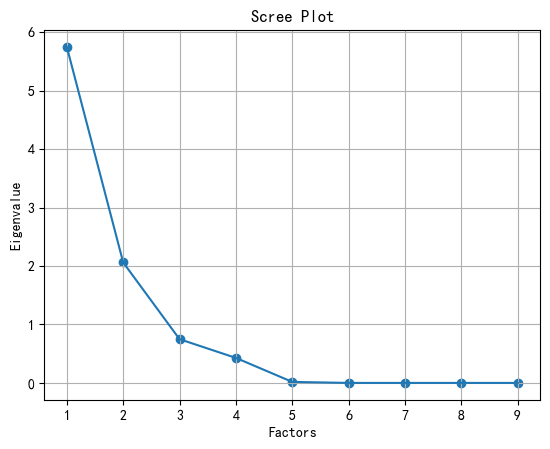

In [77]:
 # 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)

# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")

plt.grid()  # 显示网格
#导出图片
plt.savefig('D:\M\MATLAB Driver/forward\eighth\因子分析_德国_特征值.png',dpi=300,bbox_inches='tight')

 ### 从上面的图形中，我们明确地看到：选择2或3个因子就可以了

# 5.因子旋转

## 5.1 建立因子分析模型
在这里选择，最大方差化因子旋转

In [78]:
# 选择方式： varimax 方差最大化
# 选择固定因子为 2 个
faa_two = FactorAnalyzer(2,rotation='varimax')
faa_two.fit(df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

## 5.2 查看因子方差-get_communalities()
查看公因子方差

In [79]:
# 公因子方差
faa_two.get_communalities()

array([0.97418286, 0.95166661, 0.96061345, 1.01533145, 0.99048887,
       0.28757789, 0.75453369, 0.91536663, 0.71258505])

查看每个变量的公因子方差数据

In [80]:
gyz=pd.DataFrame(faa_two.get_communalities(),index=df.columns)
#百分比形式
gyz

,0
X1,0.974183
X3,0.951667
X4,0.960613
X2,1.015331
X5,0.990489
X6,0.287578
X7,0.754534
X8,0.915367
X9,0.712585


## 5.3 查看旋转后的特征值

In [81]:
faa_two.get_eigenvalues()

(array([ 5.74674244e+00,  2.06040039e+00,  7.47989065e-01,  4.27646944e-01,
         1.72211628e-02,  7.80463617e-16,  2.72313033e-16, -4.47432063e-17,
        -3.19483750e-16]),
 array([ 5.64736372,  1.9236936 ,  0.3165333 ,  0.15943448, -0.00617602,
        -0.03743969, -0.06905706, -0.13226077, -0.23974506]))

In [82]:
vt=pd.DataFrame(faa_two.get_eigenvalues())
#将vt转置
vt=vt.T
#两列各自百分比形式
vt.columns=['特征值0','特征值1']
vt['特征值0百分比']=vt['特征值0']/vt['特征值0'].sum()
vt['特征值1百分比']=vt['特征值1']/vt['特征值1'].sum()
#两列各自累计百分比形式
vt['特征值0累计百分比']=vt['特征值0百分比'].cumsum()
vt['特征值1累计百分比']=vt['特征值1百分比'].cumsum()
vt



,特征值0,特征值1,特征值0百分比,特征值1百分比,特征值0累计百分比,特征值1累计百分比
0,5.746742e+00,5.647364,6.385269e-01,0.746774,0.638527,0.746774
1,2.060400e+00,1.923694,2.289334e-01,0.254378,0.867460,1.001152
2,7.479891e-01,0.316533,8.310990e-02,0.041856,0.950570,1.043008
3,4.276469e-01,0.159434,4.751633e-02,0.021083,0.998087,1.064091
4,1.722116e-02,-0.006176,1.913463e-03,-0.000817,1.000000,1.063274
5,7.804636e-16,-0.037440,8.671818e-17,-0.004951,1.000000,1.058324
6,2.723130e-16,-0.069057,3.025700e-17,-0.009132,1.000000,1.049192
7,-4.474321e-17,-0.132261,-4.971467e-18,-0.017489,1.000000,1.031702
8,-3.194837e-16,-0.239745,-3.549819e-17,-0.031702,1.000000,1.000000


 ## 5.4 查看成分矩阵
 查看它们构成的成分矩阵

In [83]:
# 变量个数*因子个数
faa_two.loadings_

array([[ 0.91379018,  0.37305544],
       [ 0.90459798,  0.36519735],
       [ 0.88579013,  0.41951077],
       [-0.12787164,  0.99949002],
       [ 0.80818001,  0.58080457],
       [ 0.22274732,  0.487813  ],
       [ 0.79197343, -0.35680775],
       [-0.44114135, -0.84897641],
       [ 0.32771598,  0.77793784]])

如果转成DataFrame格式，index就是我们的变量，columns就是指定的因子factor。转DataFrame格式后的数据：

In [84]:
tt=pd.DataFrame(faa_two.loadings_,index=df.columns)
tt

,0,1
X1,0.913790,0.373055
X3,0.904598,0.365197
X4,0.885790,0.419511
X2,-0.127872,0.999490
X5,0.808180,0.580805
X6,0.222747,0.487813
X7,0.791973,-0.356808
X8,-0.441141,-0.848976
X9,0.327716,0.777938


In [85]:
faa_two = FactorAnalyzer(2,rotation='promax')
faa_two.fit(df)
faa_two.loadings_
#转换成DataFrame
tt=pd.DataFrame(faa_two.loadings_,index=df.columns)
tt

,0,1
X1,0.897434,0.178964
X3,0.889383,0.172738
X4,0.856159,0.235874
X2,-0.375865,1.108543
X5,0.734013,0.428679
X6,0.124312,0.471405
X7,0.939656,-0.577986
X8,-0.274065,-0.807361
X9,0.168556,0.758488


## 5.5 查看因子贡献率
通过理论部分的解释，我们发现每个因子都对变量有一定的贡献，存在某个贡献度的值，在这里查看3个和贡献度相关的指标：
总方差贡献：variance (numpy array) – The factor variances
方差贡献率：proportional_variance (numpy array) – The proportional factor variances
累积方差贡献率：cumulative_variances (numpy array) – The cumulative factor variances

In [ ]:
faa_two.get_factor_variance()

(array([5.65729554, 1.43002424]),
 array([0.62858839, 0.15889158]),
 array([0.62858839, 0.78747998]))

 # 6.隐藏变量可视化
为了更直观地观察每个隐藏变量和哪些特征的关系比较大，进行可视化展示，为了方便取上面相关系数的绝对值：

In [ ]:
df1 = pd.DataFrame(np.abs(faa_two.loadings_),index=df.columns)
print(df1)

           0         1
X1  0.860533  0.459688
X3  0.843403  0.470862
X4  0.522227  0.835286
X2  0.648394  0.484748
X5  1.004102  0.002767
X6  0.941931  0.038052
X7  0.022695  0.131000
X8  0.786781  0.195066
X9  0.998659  0.087458


热力图绘制系数矩阵

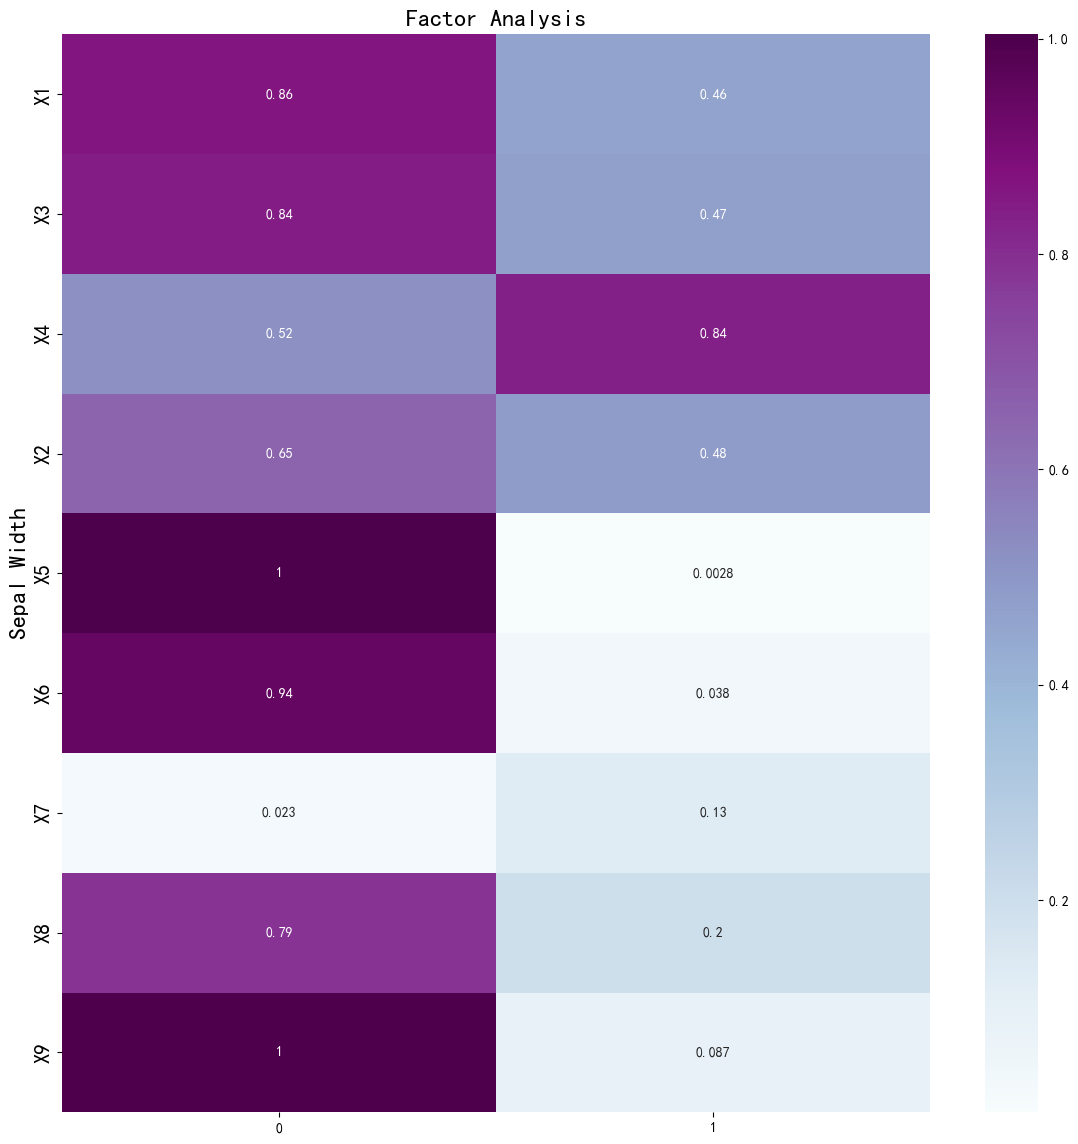

In [ ]:
# 绘图

plt.figure(figsize = (14,14))
ax = sns.heatmap(df1, annot=True, cmap="BuPu")

# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")

# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()

# 保存图片
# plt.savefig("factorAnalysis", dpi=500)

# 7.转成新变量
上面我们已经知道了2个因子比较合适，可以将原始数据转成2个新的特征，具体转换方式为

In [ ]:
faa_two.transform(df)

array([[-0.73170602, -1.65091182],
       [-0.57027856, -0.5044919 ],
       [-0.65601858,  0.61922155],
       [-0.53840528,  0.84926237],
       [ 0.40556193,  1.05874873],
       [ 2.05946073, -0.39750209]])

转成DataFrame格式后数据展示效果更好：

In [ ]:
df2 = pd.DataFrame(faa_two.transform(df))
print(df2)

          0         1
0 -0.731706 -1.650912
1 -0.570279 -0.504492
2 -0.656019  0.619222
3 -0.538405  0.849262
4  0.405562  1.058749
5  2.059461 -0.397502
